## Process the Census Bureau TabBlock Dataset for Block Centroid Points

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import geoplot
import fiona
import os

### Import dataset using FTP

In [2]:
state_raw = gpd.read_file('ftp://ftp2.census.gov/geo/tiger/TIGER2018/TABBLOCK/tl_2018_21_tabblock10.zip')

In [3]:
state_raw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 161672 entries, 0 to 161671
Data columns (total 16 columns):
STATEFP10     161672 non-null object
COUNTYFP10    161672 non-null object
TRACTCE10     161672 non-null object
BLOCKCE10     161672 non-null object
GEOID10       161672 non-null object
NAME10        161672 non-null object
MTFCC10       161672 non-null object
UR10          161672 non-null object
UACE10        56655 non-null object
UATYPE        56655 non-null object
FUNCSTAT10    161672 non-null object
ALAND10       161672 non-null int64
AWATER10      161672 non-null int64
INTPTLAT10    161672 non-null object
INTPTLON10    161672 non-null object
geometry      161672 non-null object
dtypes: int64(2), object(14)
memory usage: 19.7+ MB


In [4]:
print('CRS: ', state_raw.crs)

CRS:  {'init': 'epsg:4269'}


#### Make a copy of dataframe for manipulations

In [5]:
block_centroid = state_raw.copy()

#### Drop unneeded columns

In [6]:
columns =['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10', 'NAME10', 'MTFCC10', 'UR10', 'UACE10', 'UATYPE', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10']

In [7]:
block_centroid.drop(columns, inplace=True, axis=1)

In [8]:
block_centroid.head()

GEOID10                                           geometry
0  210099503002074  POLYGON ((-85.967221 37.029612, -85.967004 37....
1  212270115002051  POLYGON ((-86.374337 36.905521, -86.374335 36....
2  211499705002073  POLYGON ((-87.31331899999999 37.447166, -87.31...
3  210459503003016  POLYGON ((-84.91801699999999 37.325795, -84.91...
4  210979503002030  POLYGON ((-84.33703199999999 38.396072, -84.33...

### Plot Polygons

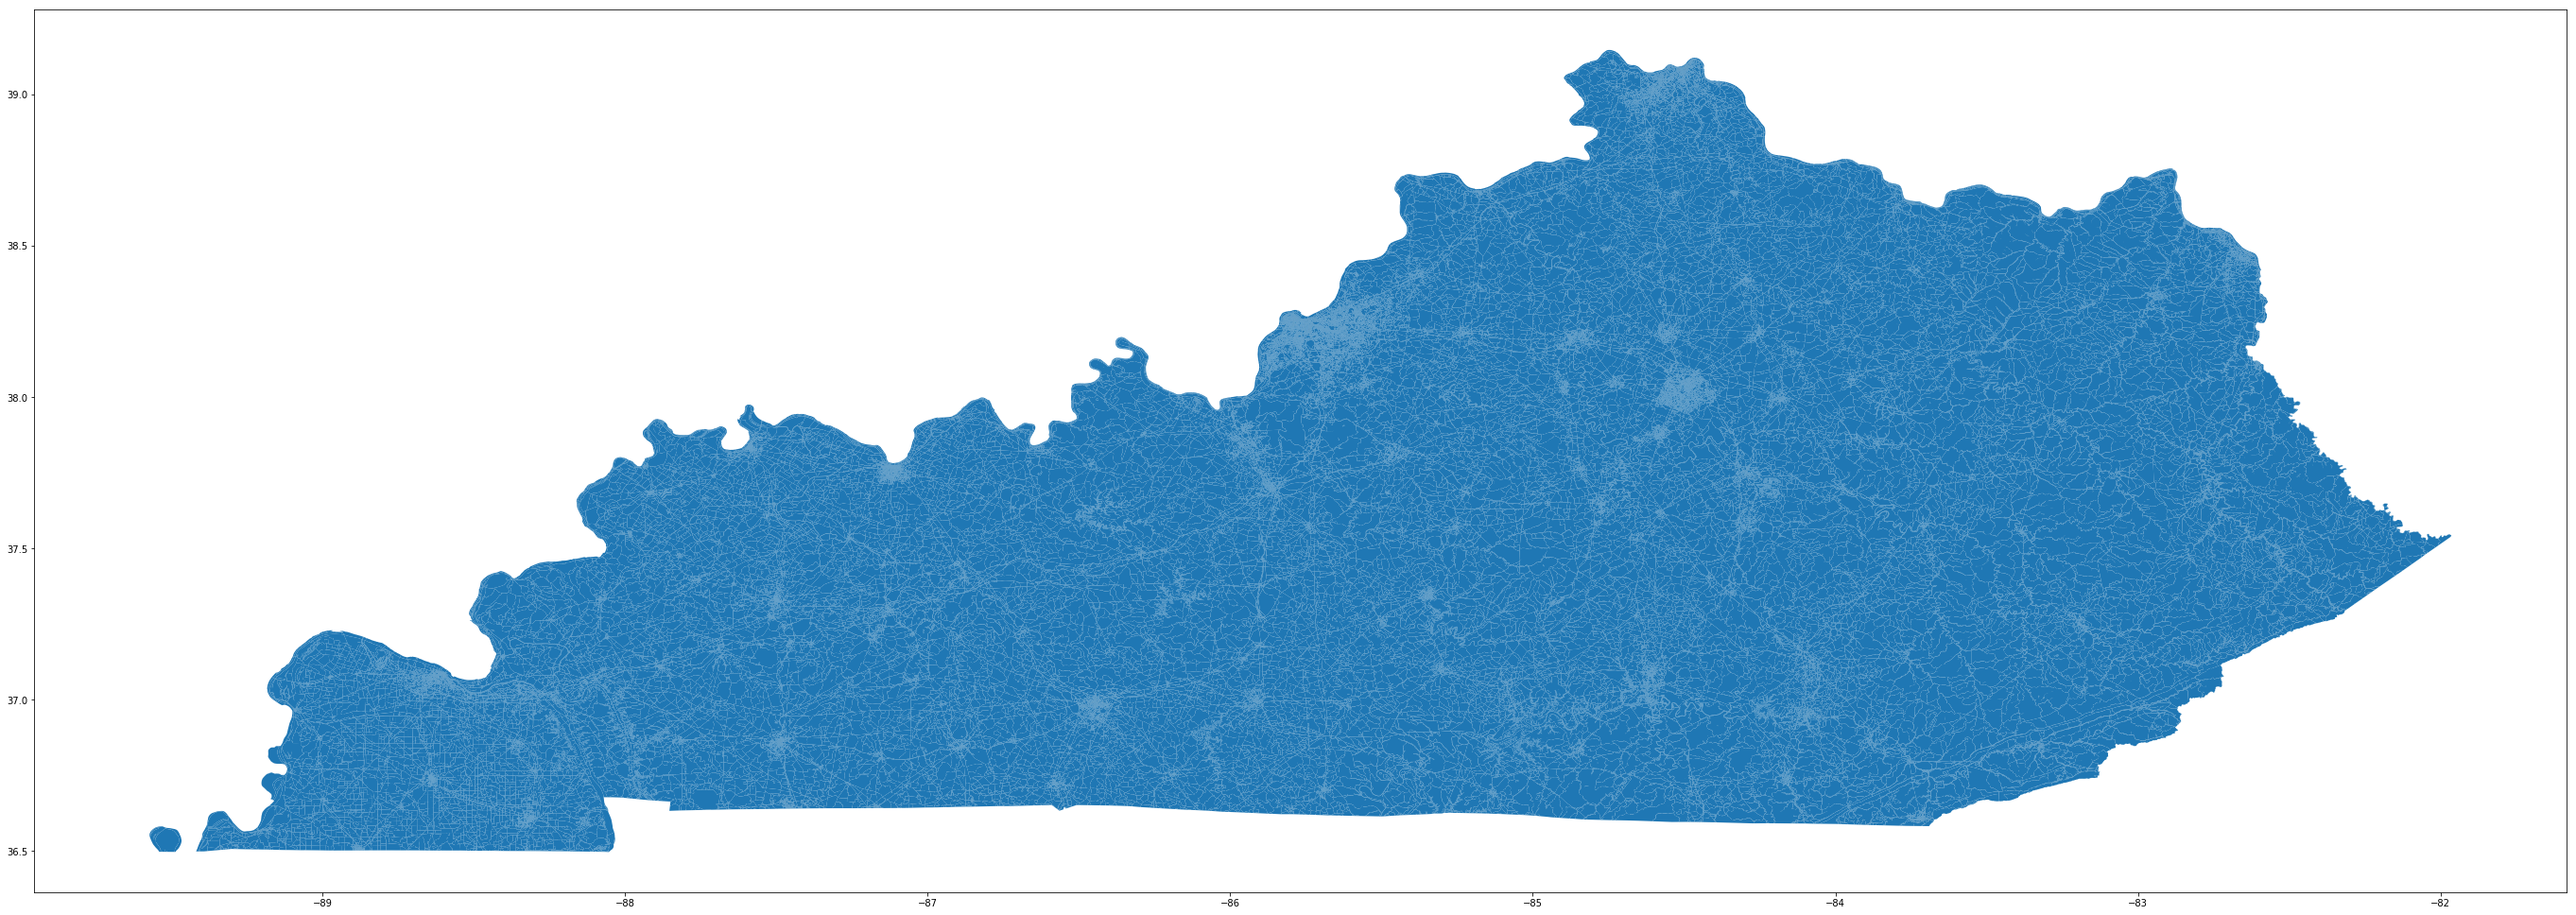

In [9]:
ax =state_raw.plot(figsize=(48,48));

#### Copy polygon geometry 

In [10]:
block_centroid['geom_poly'] = block_centroid['geometry']

### Create point geometry

In [11]:
block_centroid['geometry'] = block_centroid['geometry'].centroid

#### Copy point geometry 

In [12]:
block_centroid['geom_point'] = block_centroid['geometry']

In [13]:
block_centroid.head()

GEOID10                                      geometry  \
0  210099503002074  POINT (-85.96712325659169 37.02949636708048)   
1  212270115002051  POINT (-86.37387391795728 36.90541189904414)   
2  211499705002073   POINT (-87.30233857270636 37.4389591802903)   
3  210459503003016   POINT (-84.91520401873865 37.3272738088077)   
4  210979503002030  POINT (-84.32867151855348 38.38729589948303)   

                                           geom_poly  \
0  POLYGON ((-85.967221 37.029612, -85.967004 37....   
1  POLYGON ((-86.374337 36.905521, -86.374335 36....   
2  POLYGON ((-87.31331899999999 37.447166, -87.31...   
3  POLYGON ((-84.91801699999999 37.325795, -84.91...   
4  POLYGON ((-84.33703199999999 38.396072, -84.33...   

                                     geom_point  
0  POINT (-85.96712325659169 37.02949636708048)  
1  POINT (-86.37387391795728 36.90541189904414)  
2   POINT (-87.30233857270636 37.4389591802903)  
3   POINT (-84.91520401873865 37.3272738088077)  
4  POINT (-84.32867151855348 38.38729589948303)

In [14]:
print('CRS: ', block_centroid.crs)

CRS:  {'init': 'epsg:4269'}


### Plot Points

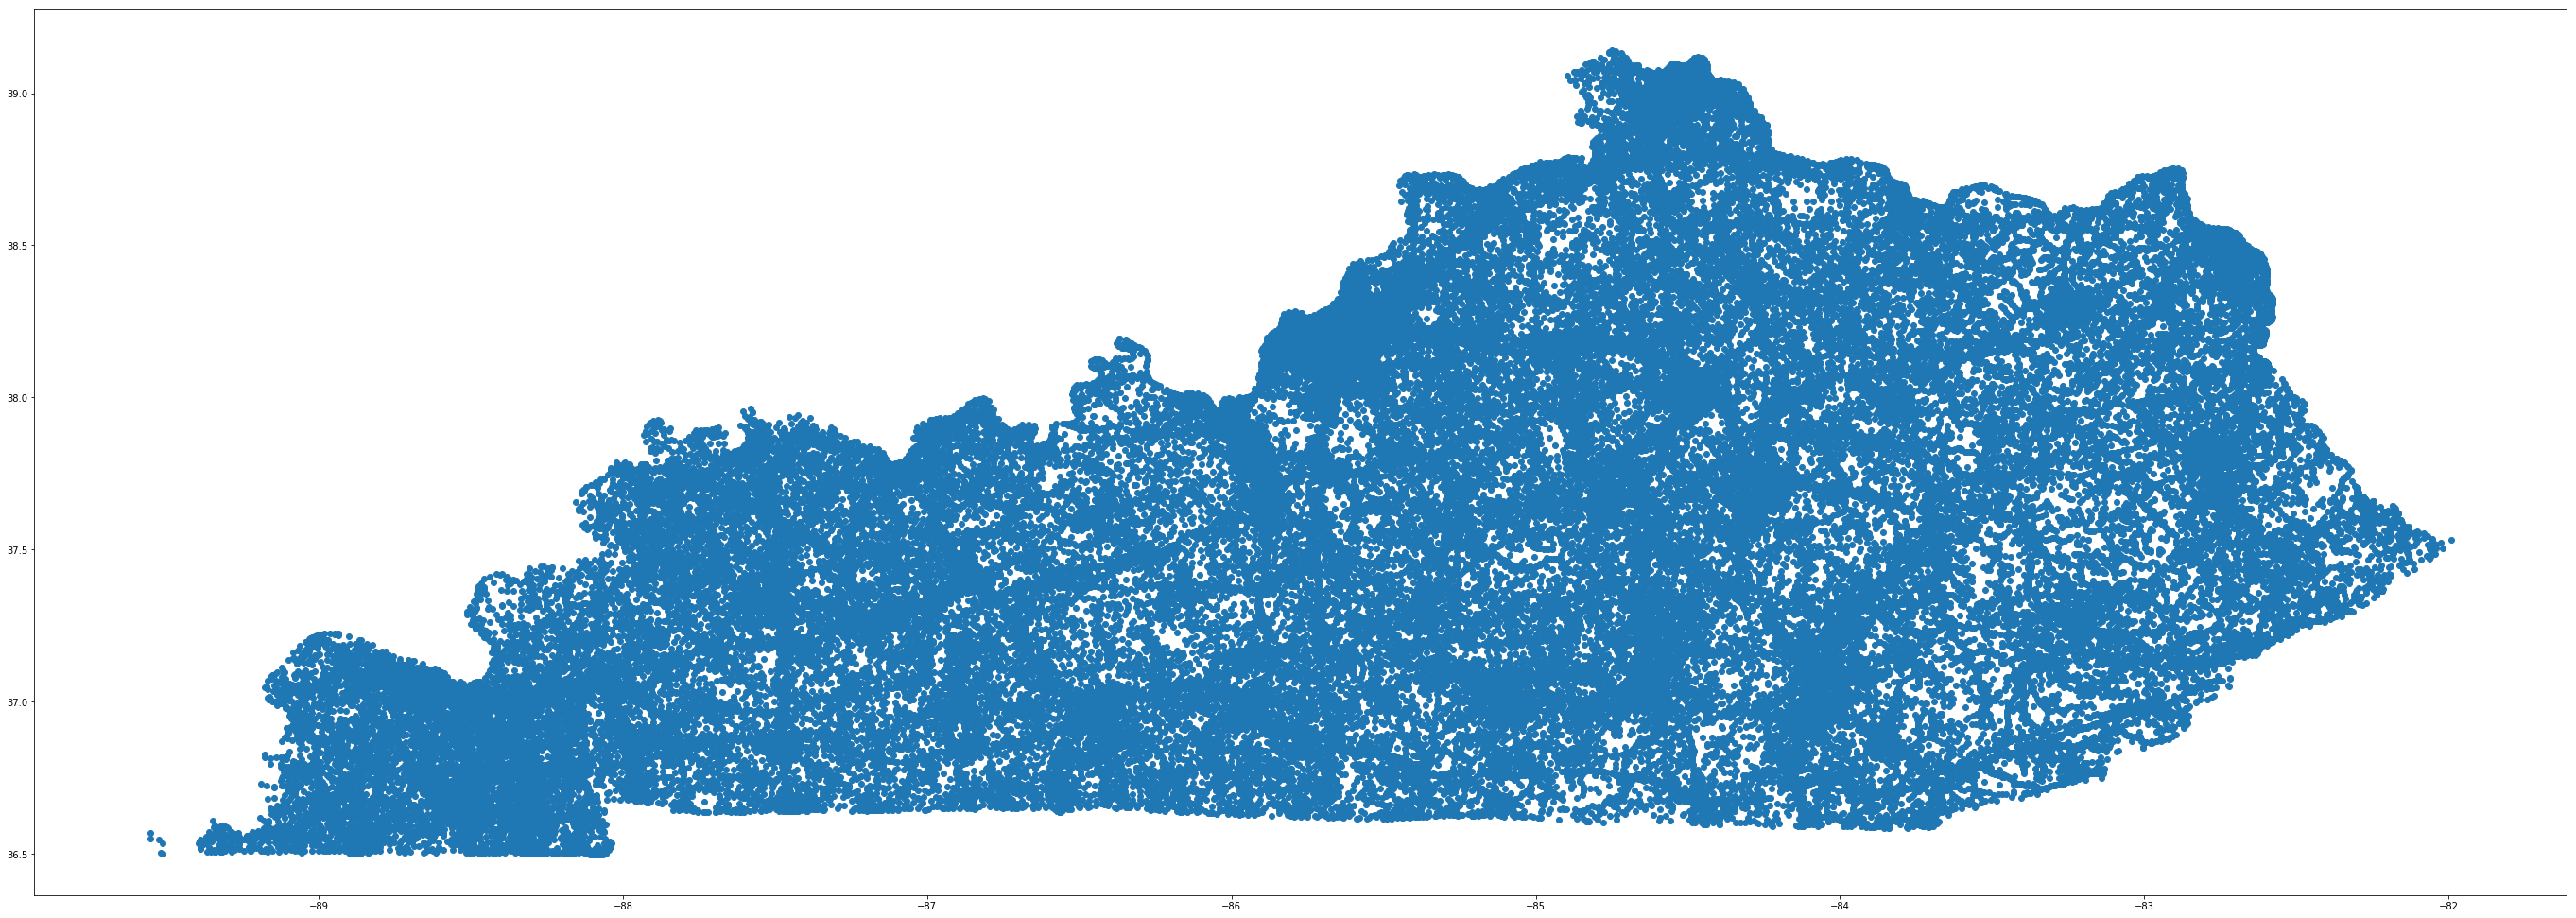

In [15]:
ax = block_centroid.plot(figsize=(48,48));

### Add new columns to contain x,y coordinates of centroid

In [16]:
block_centroid['x-coord'] = block_centroid['geometry'].x 

In [17]:
block_centroid['y-coord'] = block_centroid['geometry'].y

In [18]:
block_centroid['coords'] = block_centroid[['x-coord', 'y-coord']].apply(lambda x: ', '.join(x.astype(str)), axis=1)

In [19]:
columns =['x-coord', 'y-coord']

In [20]:
columns

['x-coord', 'y-coord']

In [21]:
block_centroid.drop(columns, inplace=True, axis=1)

In [22]:
block_centroid.head()

GEOID10                                      geometry  \
0  210099503002074  POINT (-85.96712325659169 37.02949636708048)   
1  212270115002051  POINT (-86.37387391795728 36.90541189904414)   
2  211499705002073   POINT (-87.30233857270636 37.4389591802903)   
3  210459503003016   POINT (-84.91520401873865 37.3272738088077)   
4  210979503002030  POINT (-84.32867151855348 38.38729589948303)   

                                           geom_poly  \
0  POLYGON ((-85.967221 37.029612, -85.967004 37....   
1  POLYGON ((-86.374337 36.905521, -86.374335 36....   
2  POLYGON ((-87.31331899999999 37.447166, -87.31...   
3  POLYGON ((-84.91801699999999 37.325795, -84.91...   
4  POLYGON ((-84.33703199999999 38.396072, -84.33...   

                                     geom_point  \
0  POINT (-85.96712325659169 37.02949636708048)   
1  POINT (-86.37387391795728 36.90541189904414)   
2   POINT (-87.30233857270636 37.4389591802903)   
3   POINT (-84.91520401873865 37.3272738088077)   
4  POINT (-84.32867151855348 38.38729589948303)   

                                   coords  
0  -85.96712325659169, 37.029496367080476  
1   -86.37387391795728, 36.90541189904414  
2    -87.30233857270636, 37.4389591802903  
3    -84.91520401873865, 37.3272738088077  
4   -84.32867151855348, 38.38729589948303

### Write dataframe to CSV

In [23]:
filename = 'ky_block_centroids.csv'

In [24]:
block_centroid.to_csv(filename)

#### Write dataframe to JSON (disabled)

### Create a very small dataset  
FIPS = '21067' is Fayette County, KY

In [25]:
block_centroid['FIPS'] = block_centroid.GEOID10.str.slice(0, 5)

In [26]:
fayette_points = block_centroid.loc[(block_centroid.FIPS == '21067')]

In [27]:
fayette_points.head()

GEOID10                                      geometry  \
170  210670038021014  POINT (-84.39278117241348 38.17705828435935)   
171  210670039182036  POINT (-84.34930406992289 37.95718504830145)   
172  210670040072031  POINT (-84.36542804063134 37.93146844943821)   
173  210670020011004  POINT (-84.55155375613332 38.05127223278702)   
181  210670034062007  POINT (-84.44902598521861 37.96805356556233)   

                                             geom_poly  \
170  POLYGON ((-84.40511599999999 38.1808, -84.4043...   
171  POLYGON ((-84.36273899999999 37.96685799999999...   
172  POLYGON ((-84.366513 37.93213, -84.366474 37.9...   
173  POLYGON ((-84.552088 38.051923, -84.5520679999...   
181  POLYGON ((-84.449243 37.96847899999999, -84.44...   

                                       geom_point  \
170  POINT (-84.39278117241348 38.17705828435935)   
171  POINT (-84.34930406992289 37.95718504830145)   
172  POINT (-84.36542804063134 37.93146844943821)   
173  POINT (-84.55155375613332 38.05127223278702)   
181  POINT (-84.44902598521861 37.96805356556233)   

                                     coords   FIPS  
170   -84.39278117241348, 38.17705828435935  21067  
171    -84.3493040699229, 37.95718504830145  21067  
172  -84.36542804063134, 37.931468449438206  21067  
173   -84.55155375613332, 38.05127223278702  21067  
181   -84.44902598521861, 37.96805356556233  21067

In [28]:
fayette_points.drop('FIPS', inplace=True, axis=1)

C:\Users\Mark\Anaconda3\envs\sandbox\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


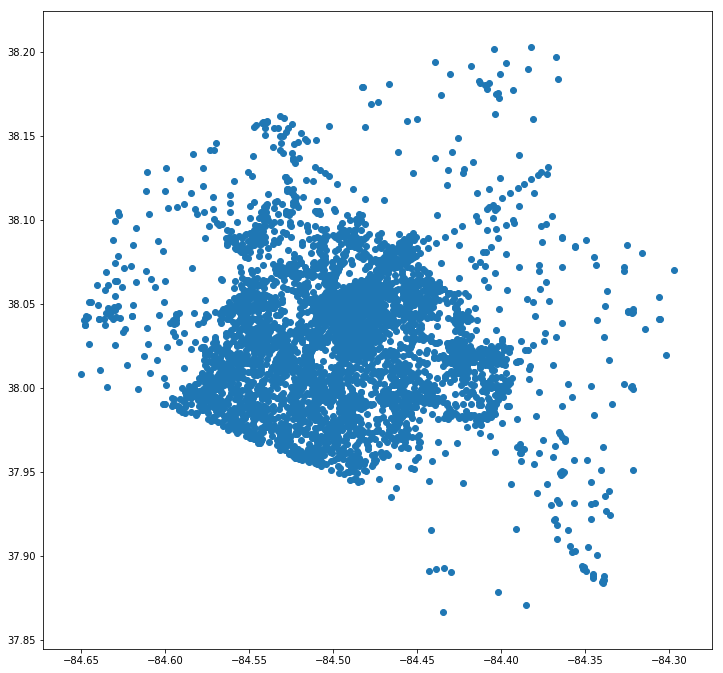

In [29]:
ax = fayette_points.plot(figsize=(12,12));

C:\Users\Mark\Anaconda3\envs\sandbox\lib\site-packages\geopandas\geodataframe.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame[geo_column_name] = level


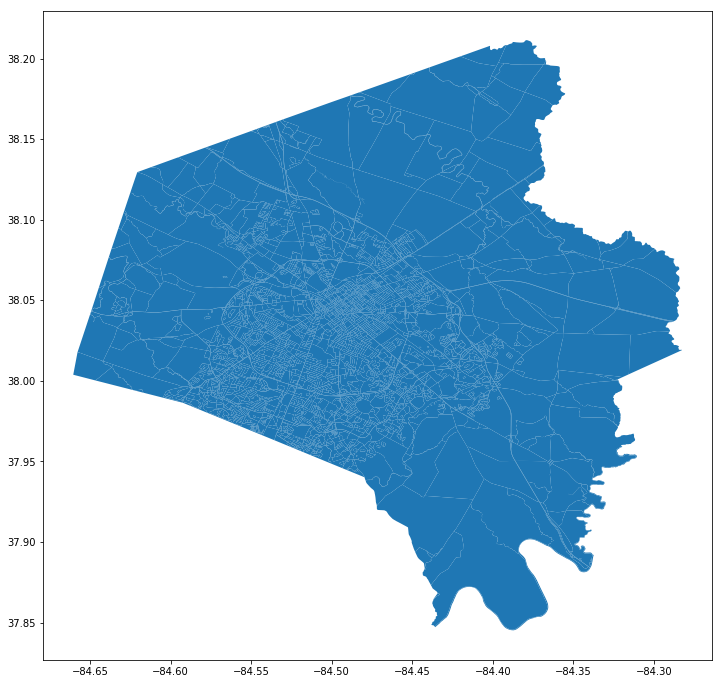

In [30]:
fayette_points.geometry = fayette_points.geom_poly
ax = fayette_points.plot(figsize=(12,12));

#### Write single county dataset to JSON

In [31]:
json_filename = 'fayette_centroid_points.json'
try: 
    os.remove(json_filename)
except OSError:
    pass
fayette_points.to_file(json_filename, driver="GeoJSON")

C:\Users\Mark\Anaconda3\envs\sandbox\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


ValueError: Invalid field type <class 'shapely.geometry.polygon.Polygon'>

### Create new dataframe to contain 1 census block

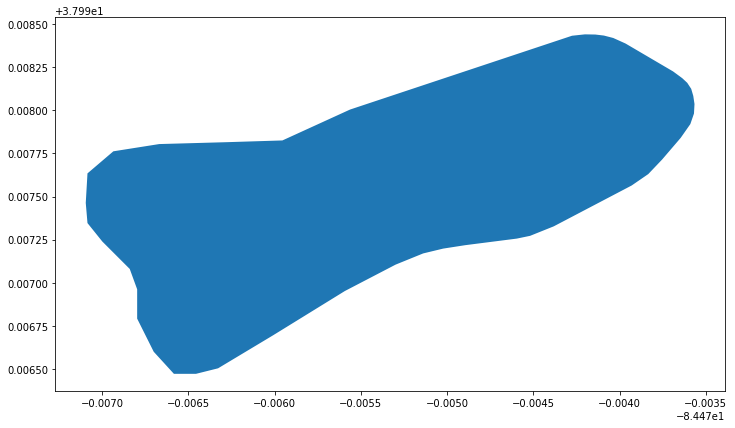

In [32]:
 my_block = state_raw.loc[state_raw['GEOID10'] == '210670023022003']
 ax = my_block.plot(figsize=(12,12));

In [33]:
my_block.centroid

60981    POINT (-84.47541262669705 37.99753773410178)
dtype: object

In [34]:
block_centroid.head()

GEOID10                                      geometry  \
0  210099503002074  POINT (-85.96712325659169 37.02949636708048)   
1  212270115002051  POINT (-86.37387391795728 36.90541189904414)   
2  211499705002073   POINT (-87.30233857270636 37.4389591802903)   
3  210459503003016   POINT (-84.91520401873865 37.3272738088077)   
4  210979503002030  POINT (-84.32867151855348 38.38729589948303)   

                                           geom_poly  \
0  POLYGON ((-85.967221 37.029612, -85.967004 37....   
1  POLYGON ((-86.374337 36.905521, -86.374335 36....   
2  POLYGON ((-87.31331899999999 37.447166, -87.31...   
3  POLYGON ((-84.91801699999999 37.325795, -84.91...   
4  POLYGON ((-84.33703199999999 38.396072, -84.33...   

                                     geom_point  \
0  POINT (-85.96712325659169 37.02949636708048)   
1  POINT (-86.37387391795728 36.90541189904414)   
2   POINT (-87.30233857270636 37.4389591802903)   
3   POINT (-84.91520401873865 37.3272738088077)   
4  POINT (-84.32867151855348 38.38729589948303)   

                                   coords   FIPS  
0  -85.96712325659169, 37.029496367080476  21009  
1   -86.37387391795728, 36.90541189904414  21227  
2    -87.30233857270636, 37.4389591802903  21149  
3    -84.91520401873865, 37.3272738088077  21045  
4   -84.32867151855348, 38.38729589948303  21097

### Test switching between geometries

In [35]:
block_centroid['geometry'] = block_centroid['geom_poly']

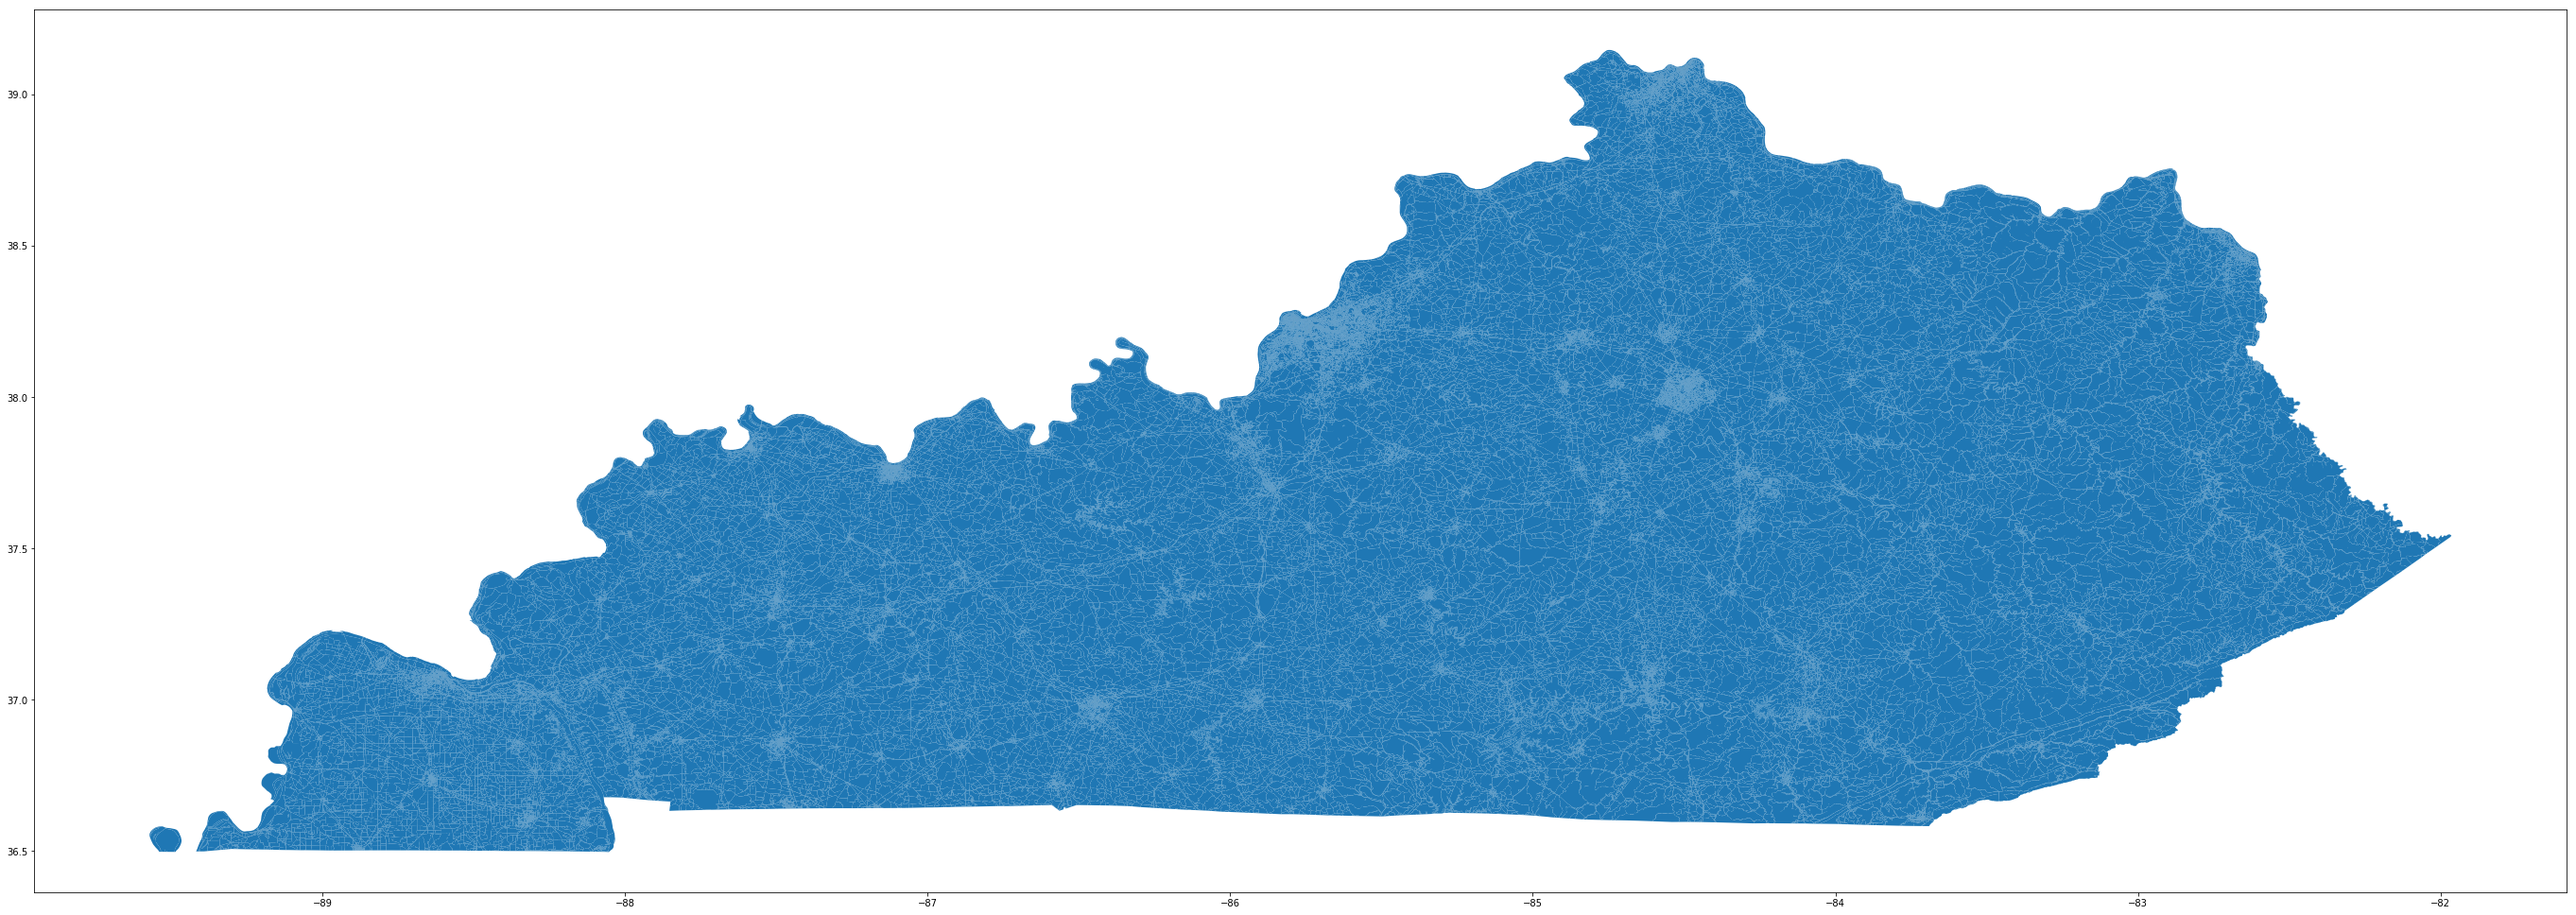

In [36]:
ax = block_centroid.plot(figsize=(48,48));

In [37]:
block_centroid['geometry'] = block_centroid['geom_point']

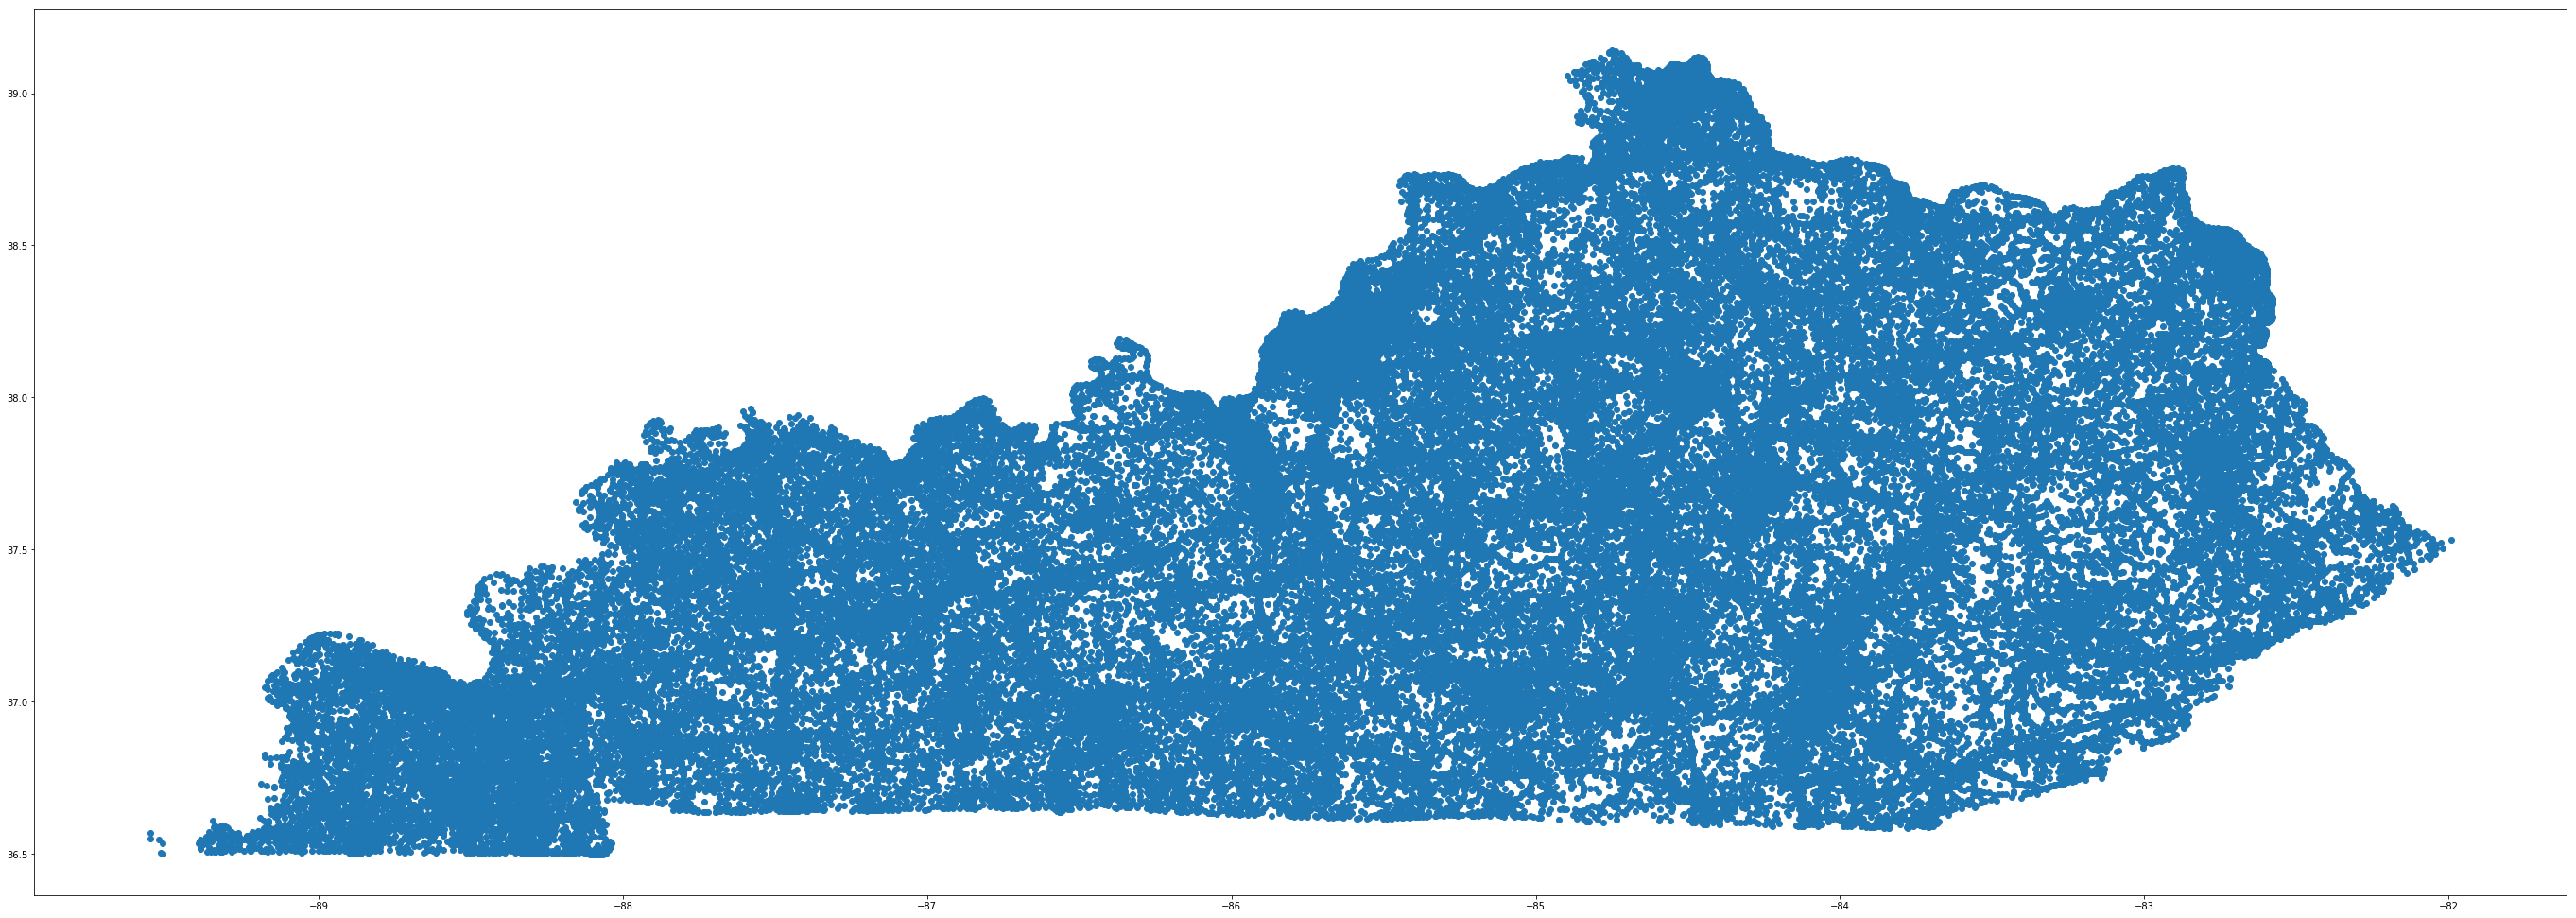

In [38]:
ax = block_centroid.plot(figsize=(48,48));